<a href="https://colab.research.google.com/github/Rehana001/Tensorflow_callback/blob/main/Improving_computer_vision_Accuracy_using_Convulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first we will install tensorflow 2.5.0

In [ ]:
pip install -U tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 13 kB/s 
     |████████████████████████████████| 1.2 MB 52.3 MB/s 
     |████████████████████████████████| 462 kB 46.2 MB/s 
     |████████████████████████████████| 4.0 MB 18.4 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.5.0


In [ ]:
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()
training_images= training_images/ 255.0
test_images= test_images/ 255.0
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)
test_loss=model.evaluate(test_images,test_labels)


4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4957 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.8858
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3550 - accuracy: 0.8722


Now finding the accuracy by Convulational Neural Networks (CNN) 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(training_images,training_labels, epochs=5)
test_loss=model.evaluate(test_images,test_labels)

2.5.0
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)         

# *Visualizing Convolutions and Pooling *

This code will show us convolutions graphically. They are all shoes , lets take a look at the result of running the convolution on each and you will begin to see the common features betweeen them emerge.


In [ ]:
print(test_labels[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


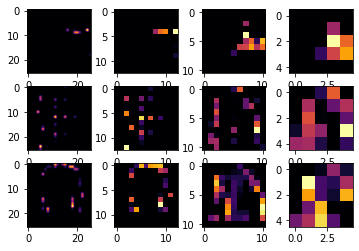

In [ ]:
import matplotlib.pyplot as plt 
f,axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER=1
from tensorflow.keras import models
layer_outputs=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)
for x in range(0,4):
  f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, : , : , CONVOLUTION_NUMBER],cmap='inferno')
  axarr[1,x].grid(False)
  f3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , : , CONVOLUTION_NUMBER],cmap='inferno')
  axarr[2,x].grid(False)



# **EXERCISES**

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist= tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(32,(3,3), activation='relu' , input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=10)
test_loss, test_acc=model.evaluate(test_images,test_labels)
print(test_acc)

2.5.0
Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1470 - accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0528 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0326 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 10/10
313/313 [==============================] - 3s 